In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [5]:
#string_columns

In [6]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
#sns.histplot(df.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

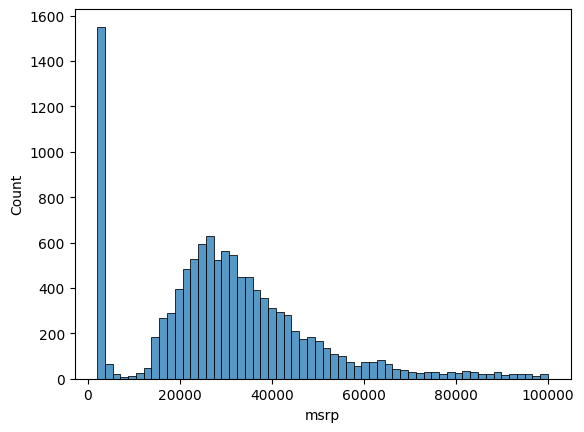

In [9]:
sns.histplot(df.msrp[df.msrp<100000])

In [10]:
log_price = np.log1p(df.msrp)

In [11]:
#sns.histplot(log_price[log_price<100000])

<Axes: xlabel='msrp', ylabel='Count'>

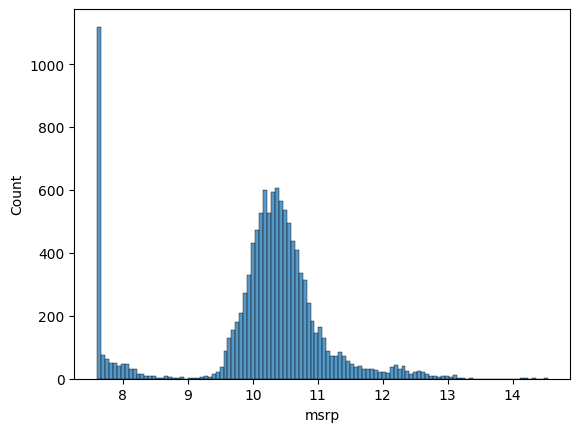

In [12]:
sns.histplot(log_price)

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [14]:
log_price.isnull().sum()

np.int64(0)

In [15]:
n = len(df)
n_val = int (0.2 *n)
n_test = int(0.2 *n)
n_train = n - (n_val + n_test)

In [16]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [17]:
df_shuffled = df.iloc[idx]

In [19]:
df_shuffled.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [20]:
df_train = df_shuffled.iloc[:n_train].copy()             
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()  
df_test = df_shuffled.iloc[n_train+n_val:].copy() 

In [21]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [22]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [23]:
def dot(xi, w):
    n = len(w)
    result = 0.00
    for j in range(n):
        result = result + xi[j]*w[j]
    return result


In [24]:
def linear_regression(xi):
    return w0 + xi.dot(w)

In [25]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]


In [27]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
 'popularity']

In [28]:
df_num = df_train[base]

In [29]:
df_num = df_num.fillna(0)

In [31]:
X_train = df_num.values


In [32]:
print(X_train)

[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 285.    6.   22.   17.  549.]
 [ 563.   12.   21.   13.   86.]
 [ 200.    4.   31.   22.  873.]]


In [33]:
w_0, w = train_linear_regression(X_train, y_train)

In [34]:
y_pred = w_0 + X_train.dot(w)

<Axes: ylabel='Count'>

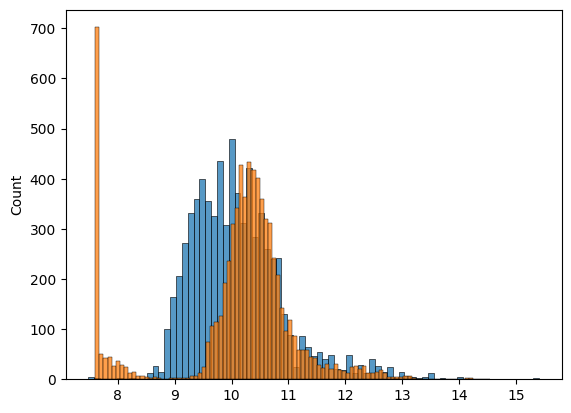

In [38]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')

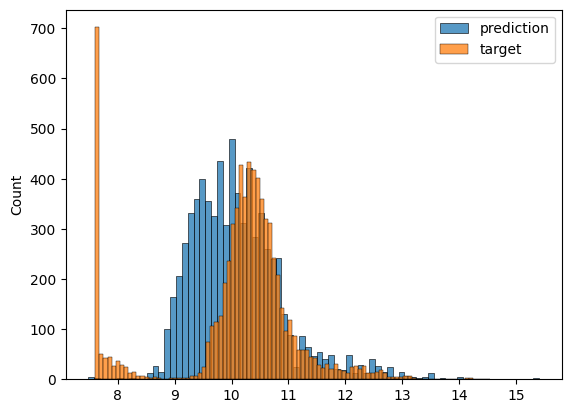

In [39]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [40]:
def rmse(y, y_pred):
    error = y_pred - y     
    mse = (error ** 2).mean()     
    return np.sqrt(mse) 


In [41]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [42]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [43]:
y_pred = w_0 + X_val.dot(w)

In [44]:
rmse(y_val, y_pred)

np.float64(0.761653099130156)

In [45]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [46]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)      
print('validation:', rmse(y_val, y_pred)) 

validation: 0.761653099130156


In [47]:
df_train.year.max()

np.int64(2017)

In [48]:
df_train['age'] = 2017 - df_train.year

In [49]:
def prepare_X(df):
    df = df.copy()      
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [50]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5172055461058299


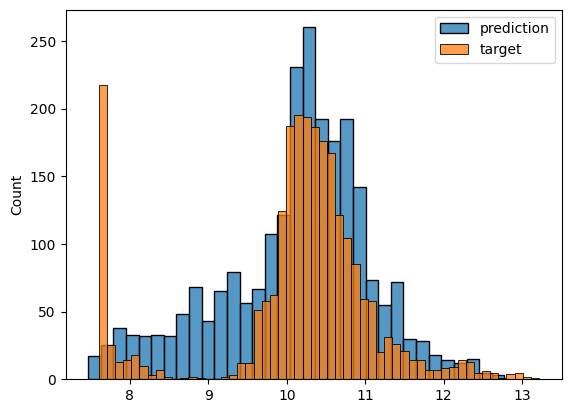

In [51]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

In [52]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:    
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
        'premium_unleaded_(recommended)', 
        'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:  
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive',
      'all_wheel_drive', 'four_wheel_drive']:    
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 
      'luxury,performance', 'hatchback']:    
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:    
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']: 
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [53]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

validation:  71.37786410717939


In [54]:
def train_linear_regression_reg(X, y, r= 0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])    
    XTX = XTX + reg 

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [55]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 15838998853873358.00, -11.14, -15838998853873556.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [56]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.46022676273364194


In [57]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

    


 1e-06 0.4602254842478849
0.0001 0.4602254932133925
 0.001 0.46022676273364194
  0.01 0.46023949636591693
   0.1 0.4603700695794901
     1 0.46182980426474285
     5 0.46840796275311086
    10 0.4757248100694009


In [58]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949636591693
test: 0.4571813679733763


In [59]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
 }

In [60]:
df_test = pd.DataFrame([ad])

In [61]:
X_test = prepare_X(df_test)

In [62]:
y_pred = w_0 + X_test.dot(w)
y_pred

array([10.25044519])

In [63]:
suggestion = np.expm1(y_pred)
suggestion

array([28294.13592896])